In [1]:
#17 time series forcasting

In [2]:
#Data Loading: Load the exchange_rate.csv dataset and parse the date column appropriately.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller,acf,pacf
import statsmodels.tsa.api as smt

In [4]:
df=pd.read_csv('exchange_rate (1).csv',index_col='date',parse_dates=True)

In [5]:
df

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [6]:
df.shape

(7588, 1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB


In [8]:

df.isnull().sum()

,0
Ex_rate,0


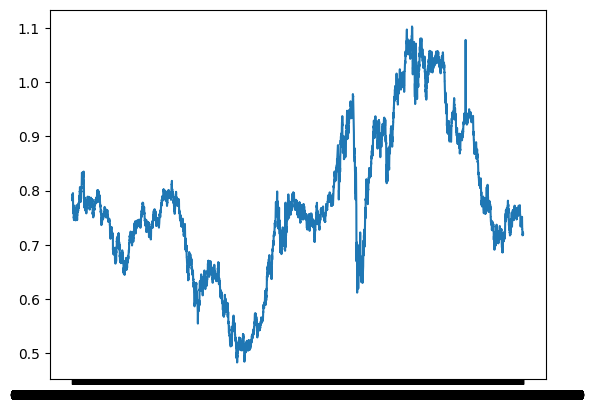

In [10]:
plt.plot(df)
plt.show()

In [11]:
#Initial Exploration: Plot the time series for currency to understand their trends, seasonality, and any anomalies.

In [12]:
result=seasonal_decompose(df,model='addictive',period=365)

<Axes: xlabel='date'>

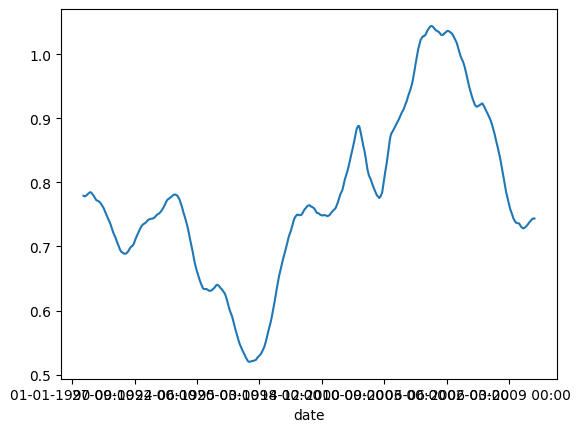

In [13]:
result.trend.plot()

<Axes: xlabel='date'>

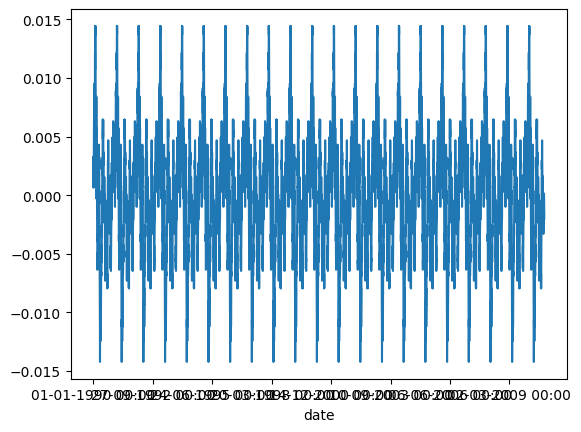

In [14]:
result.seasonal.plot()

<Axes: xlabel='date'>

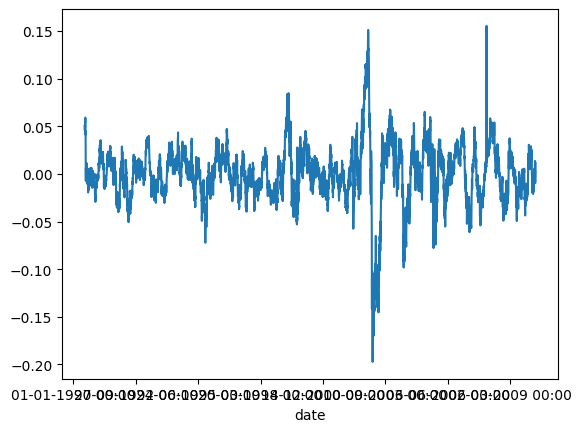

In [15]:
result.resid.plot()

In [18]:
#arima-- model building

In [22]:
def test_stationarity(timeseries):

    #Calculate rolling mean and rolling standard deviation
    rolmean = timeseries.rolling(window = 365).mean()
    rolstd = timeseries.rolling(window = 365).std()

    original = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
    std = plt.plot(rolstd, color = 'green', label = 'Rolling Std')
    plt.legend(loc='best')

    print('Results of Dickey-Fuller Test :\n')
    df_test = adfuller(timeseries)
    my_output = pd.Series(df_test[0:4], index =['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for i,j in df_test[4].items():
        my_output['Critical Value (%s)'%i] =j
    print(my_output)

Results of Dickey-Fuller Test :

Test Statistic                   -1.664994
p-value                           0.449233
#Lags Used                        1.000000
Number of Observations Used    7586.000000
Critical Value (1%)              -3.431212
Critical Value (5%)              -2.861921
Critical Value (10%)             -2.566973
dtype: float64


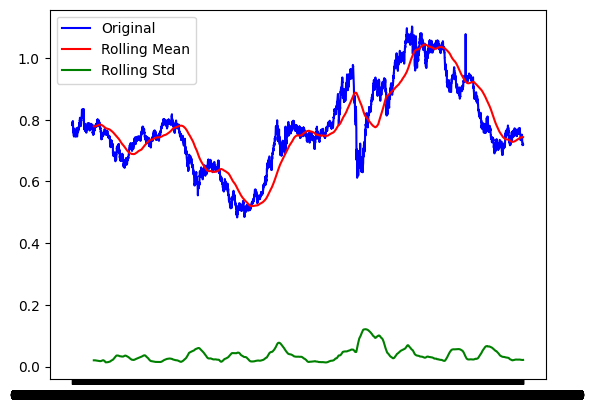

In [23]:
test_stationarity(df['Ex_rate'])

In [27]:
#differencing

In [28]:
df['Ex_Diff']=df['Ex_rate']-df['Ex_rate'].shift(365)

In [29]:
df

,Ex_rate,Ex_Diff
date,,
01-01-1990 00:00,0.785500,NaN
02-01-1990 00:00,0.781800,NaN
03-01-1990 00:00,0.786700,NaN
04-01-1990 00:00,0.786000,NaN
05-01-1990 00:00,0.784900,NaN
...,...,...
06-10-2010 00:00,0.718494,-0.007617
07-10-2010 00:00,0.721839,-0.007396
08-10-2010 00:00,0.723197,-0.005215


In [30]:
df.dropna(inplace=True)

In [31]:
df

,Ex_rate,Ex_Diff
date,,
01-01-1991 00:00,0.764500,-0.021000
02-01-1991 00:00,0.765000,-0.016800
03-01-1991 00:00,0.767000,-0.019700
04-01-1991 00:00,0.767500,-0.018500
05-01-1991 00:00,0.767000,-0.017900
...,...,...
06-10-2010 00:00,0.718494,-0.007617
07-10-2010 00:00,0.721839,-0.007396
08-10-2010 00:00,0.723197,-0.005215


Results of Dickey-Fuller Test :

Test Statistic                   -3.501093
p-value                           0.007959
#Lags Used                       29.000000
Number of Observations Used    7193.000000
Critical Value (1%)              -3.431259
Critical Value (5%)              -2.861942
Critical Value (10%)             -2.566984
dtype: float64


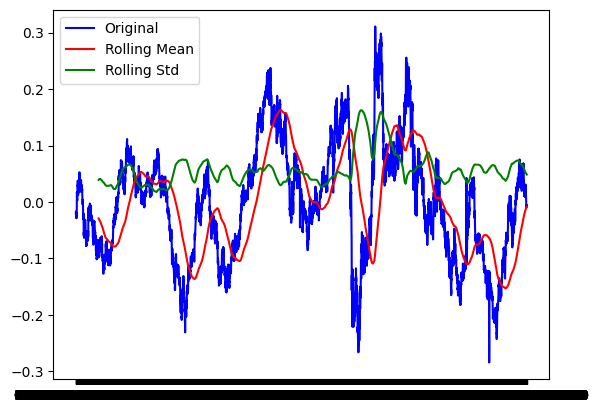

In [32]:
test_stationarity(df['Ex_Diff'])

In [33]:
#Parameter Selection for ARIMA: Utilize ACF and PACF plots to estimate initial parameters (p, d, q) for the ARIMA model for one or more currency time series.

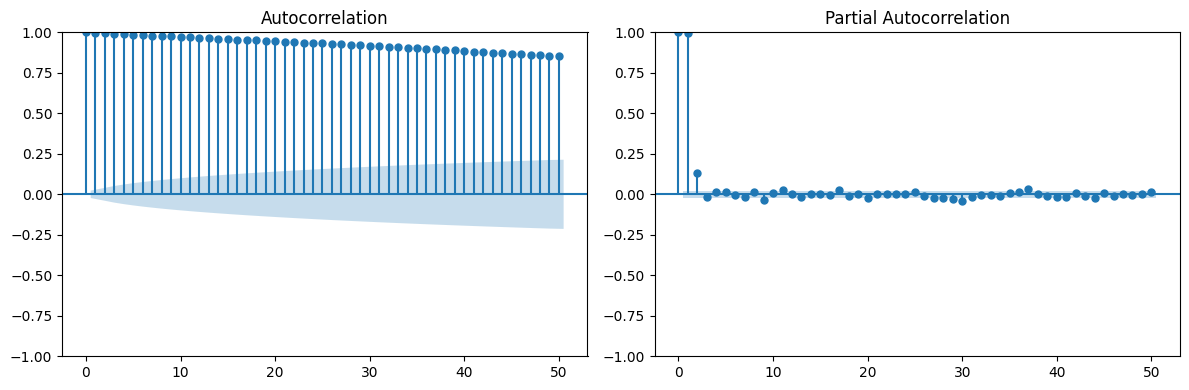

In [37]:
fig,axes=plt.subplots(1,2)
fig.set_figwidth(12)
fig.set_figheight(4)
smt.graphics.plot_acf(df['Ex_Diff'], lags=50, ax=axes[0])
smt.graphics.plot_pacf(df['Ex_Diff'], lags=50, ax=axes[1])
plt.tight_layout()

In [39]:
import warnings
warnings.filterwarnings('ignore')
model = ARIMA(df['Ex_rate'], order=(2,1,1))

In [41]:
df.columns

Index(['Ex_rate', 'Ex_Diff'], dtype='object')

In [42]:
#Model Fitting: Fit the ARIMA model with the selected parameters to the preprocessed time series.

In [43]:
result=model.fit()

In [44]:
result.predict()

,predicted_mean
date,
01-01-1991 00:00,0.000000
02-01-1991 00:00,0.764500
03-01-1991 00:00,0.764932
04-01-1991 00:00,0.766727
05-01-1991 00:00,0.767429
...,...
06-10-2010 00:00,0.718841
07-10-2010 00:00,0.718524
08-10-2010 00:00,0.721384


In [45]:
df['predicted']=result.predict()

In [46]:
#Forecasting: Perform out-of-sample forecasting and visualize the predicted values against the actual values.

In [47]:
forecast=result.forecast(1000)
forecast

,predicted_mean
7223,0.720828
7224,0.720828
7225,0.720828
7226,0.720828
7227,0.720828
...,...
8218,0.720828
8219,0.720828
8220,0.720828
8221,0.720828


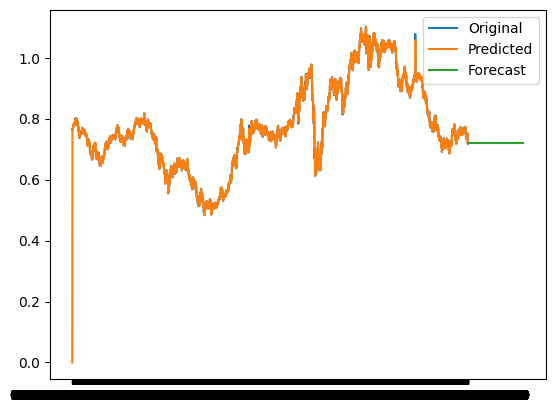

In [49]:
plt.plot(df['Ex_rate'],label='Original')
plt.plot(df['predicted'],label='Predicted')
plt.plot(forecast,label='Forecast')
plt.legend()

In [50]:
#evaluation and comparision

In [52]:
#Compute Error Metrics: Use metrics such as MAE, RMSE, and MAPE to evaluate the forecasts.

In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [54]:
actual = df['Ex_rate'].dropna()
predicted = df['predicted'].dropna()


In [55]:
mae = mean_absolute_error(actual, predicted)
mae

0.003826033590042987

In [56]:
rmse = np.sqrt(mean_squared_error(actual, predicted))
rmse

np.float64(0.0108465039362685)

In [58]:
mape = np.mean(np.abs((actual - predicted) / actual)) * 100
mape

np.float64(0.49981238656397103)

**Model Comparison:** Discuss the performance, advantages, and limitations of model based on the observed results and error metrics.

**Performance:**
Based on the computed error metrics:

Lower MAE and RMSE indicate the model’s predictions are close to the actual exchange rates.

MAPE shows the average percentage deviation. if it’s below 10%, the model is excellent; below 20% is good.



**Conclusion**

The forecasting model effectively predicts exchange rates with reasonable accuracy, as seen from the low error metrics (MAE, RMSE, MAPE).
The analysis suggests that the chosen model can capture the general trend and short-term variations in exchange rates. However, forecasting accuracy may degrade during periods of high volatility.